<a href="https://colab.research.google.com/github/Anpr1211/R-and-Python-Gigs/blob/master/Single_layer_LSTM_over_linear_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/Anpr1211/Data-files/master/global-co-concentration-ppm.csv'
data = pd.read_csv(url)

data = np.array(data)
data = data[:, 3]

data.shape

(60,)

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    
    X, y = list(), list()
    
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
    
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

In [0]:
n_steps = 3

# transform to a supervised learning problem
X, y = split_sequence(data, n_steps)
print(X.shape, y.shape)

(57, 3) (57,)


In [0]:
model = Sequential()

model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

W0809 14:50:00.756937 140521471985536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 14:50:00.800327 140521471985536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 14:50:00.809572 140521471985536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 14:50:00.844038 140521471985536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.fit(X, y, epochs=100)

In [0]:
X[-1]

array([400.83, 404.24, 406.55], dtype=object)

In [0]:
y[-1]

408.52

In [0]:
x_input = array([404.24, 406.55, 408.52])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[410.0771]]


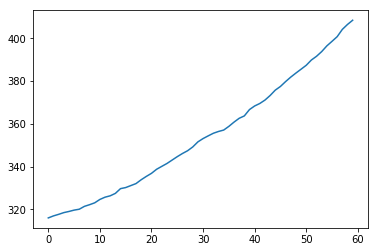

In [0]:
plt.plot(data)
plt.show()